In [1]:
import pandas as pd 

In [9]:
data = pd.read_csv('data/final_data.csv')

In [10]:
data

,DATE,interest_rates,population(in_thousand),employment2pop_ratio,unemployment_rate,gdp_per_capita,housing_unit(in_thousand),avr_rent,price_proxy
0,1987-01-01,6.43,241857.0,61.0,6.6,37132.0,1774.0,121.200,63.965
1,1987-04-01,6.37,242338.0,61.3,6.3,37454.0,1614.0,122.200,65.132
2,1987-07-01,6.58,242908.0,61.6,6.1,37685.0,1575.0,123.000,66.507
3,1987-10-01,7.29,243543.0,61.8,6.0,38238.0,1515.0,124.600,67.738
4,1988-01-01,6.83,244056.0,62.0,5.7,38359.0,1271.0,125.900,68.858
...,...,...,...,...,...,...,...,...,...
144,2023-01-01,4.33,334433.0,60.2,3.4,66096.0,1361.0,387.845,297.432
145,2023-04-01,4.83,334792.0,60.4,3.4,66357.0,1368.0,395.012,300.297
146,2023-07-01,5.12,335248.0,60.4,3.5,67050.0,1473.0,400.873,306.440
147,2023-10-01,5.33,335773.0,60.3,3.8,67513.0,1365.0,406.561,312.866


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       149 non-null    object 
 1   interest_rates             149 non-null    float64
 2   population(in_thousand)    149 non-null    float64
 3   employment2pop_ratio       149 non-null    float64
 4   unemployment_rate          149 non-null    float64
 5   gdp_per_capita             149 non-null    float64
 6   housing_unit(in_thousand)  149 non-null    float64
 7   avr_rent                   149 non-null    float64
 8   price_proxy                149 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.6+ KB


In [6]:
# Convert DATE to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

In [7]:
data.describe()

,DATE,interest_rates,population(in_thousand),employment2pop_ratio,unemployment_rate,gdp_per_capita,housing_unit(in_thousand),avr_rent,price_proxy
count,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2005-07-01 11:06:50.738254976,3.195906,293899.885906,61.314765,5.773154,51741.798658,1337.503356,228.241134,143.673792
min,1987-01-01 00:00:00,0.050000,241857.000000,51.200000,3.400000,37132.000000,478.000000,121.200000,63.965000
25%,1996-04-01 00:00:00,0.340000,268980.000000,59.800000,4.600000,43856.000000,1099.000000,160.900000,82.421000
50%,2005-07-01 00:00:00,2.990000,296077.000000,61.800000,5.400000,53242.000000,1376.000000,217.700000,141.646000
75%,2014-10-01 00:00:00,5.330000,320403.000000,62.900000,6.500000,57536.000000,1578.000000,278.797000,179.109000
max,2024-01-01 00:00:00,9.840000,336194.000000,64.700000,14.800000,67646.000000,2273.000000,411.460000,315.548000
std,NaN,2.680556,29133.372276,2.131691,1.755094,8340.504262,379.388424,75.590062,63.690832


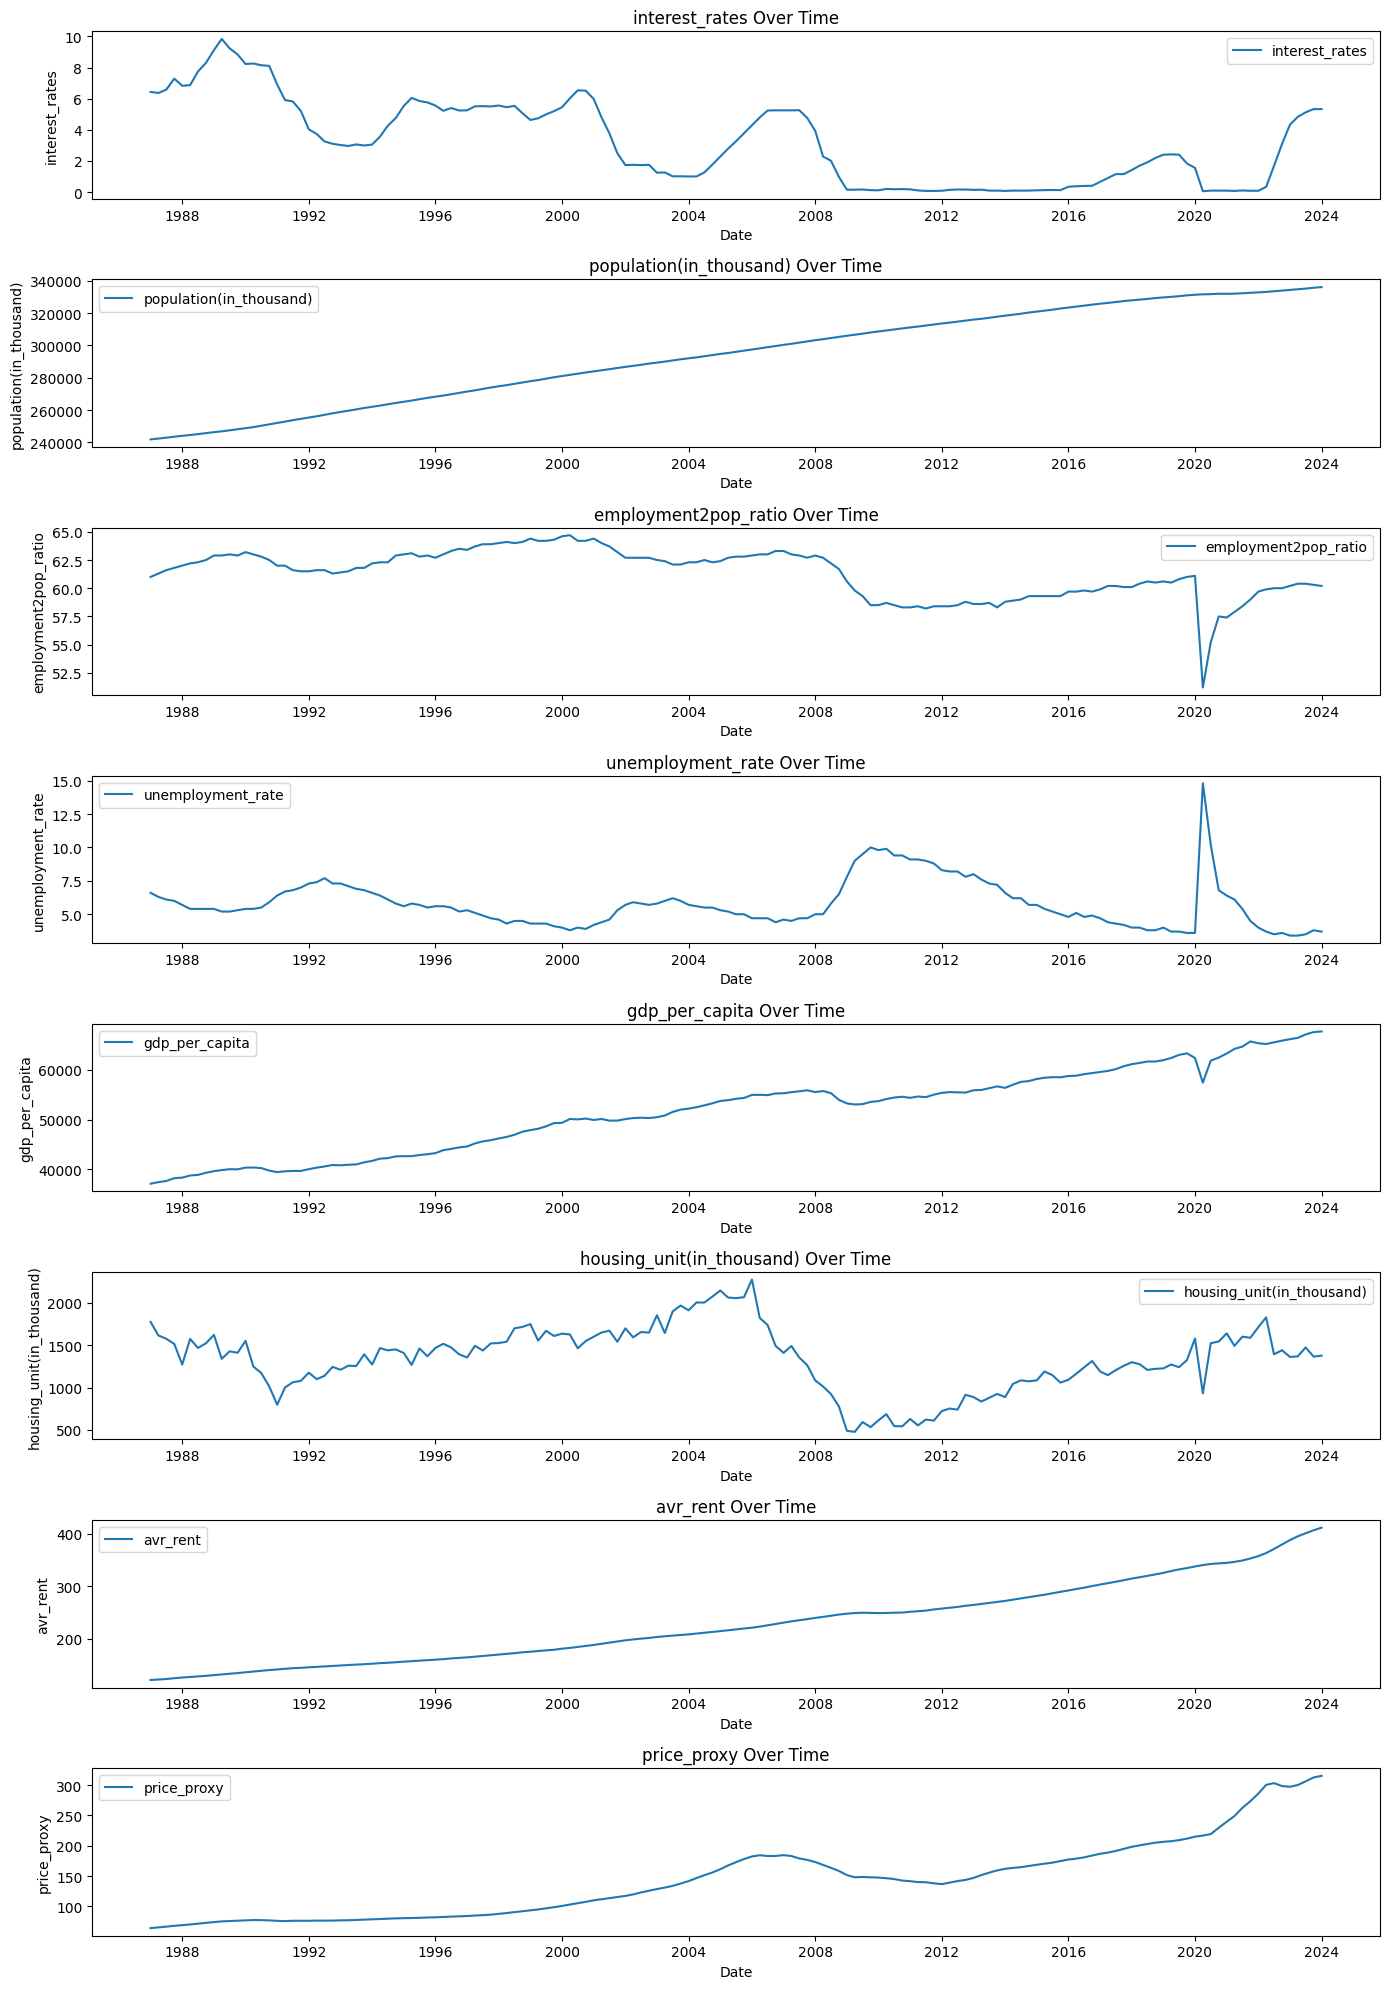

In [18]:
# Convert DATE to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Define the list of columns to plot against DATE
columns_to_plot = ['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent', 'price_proxy']

# Set up the plotting area
plt.figure(figsize=(14, 20))

# Create a subplot for each column
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    plt.plot(data['DATE'], data[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} Over Time')
    plt.legend()

plt.tight_layout()
plt.show()


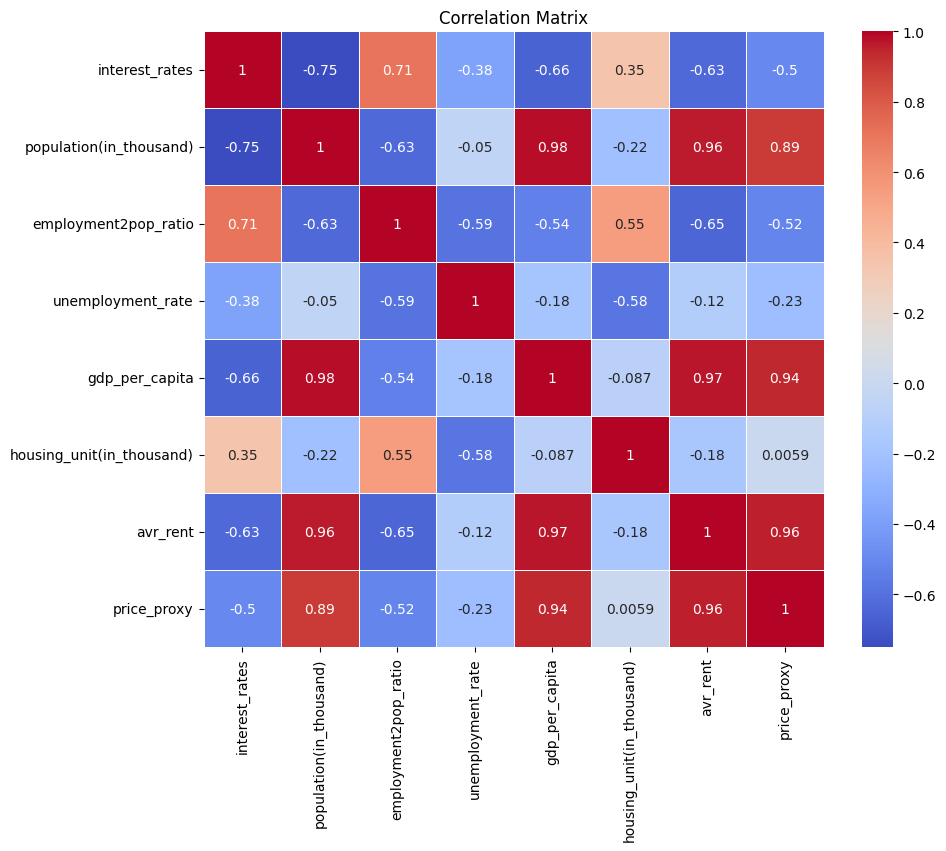

In [14]:
import seaborn as sns

# Correlation matrix
correlation_matrix = data.drop(columns=['DATE']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


- avg_rent , gdp_per_capita , population have very high correlation with house price

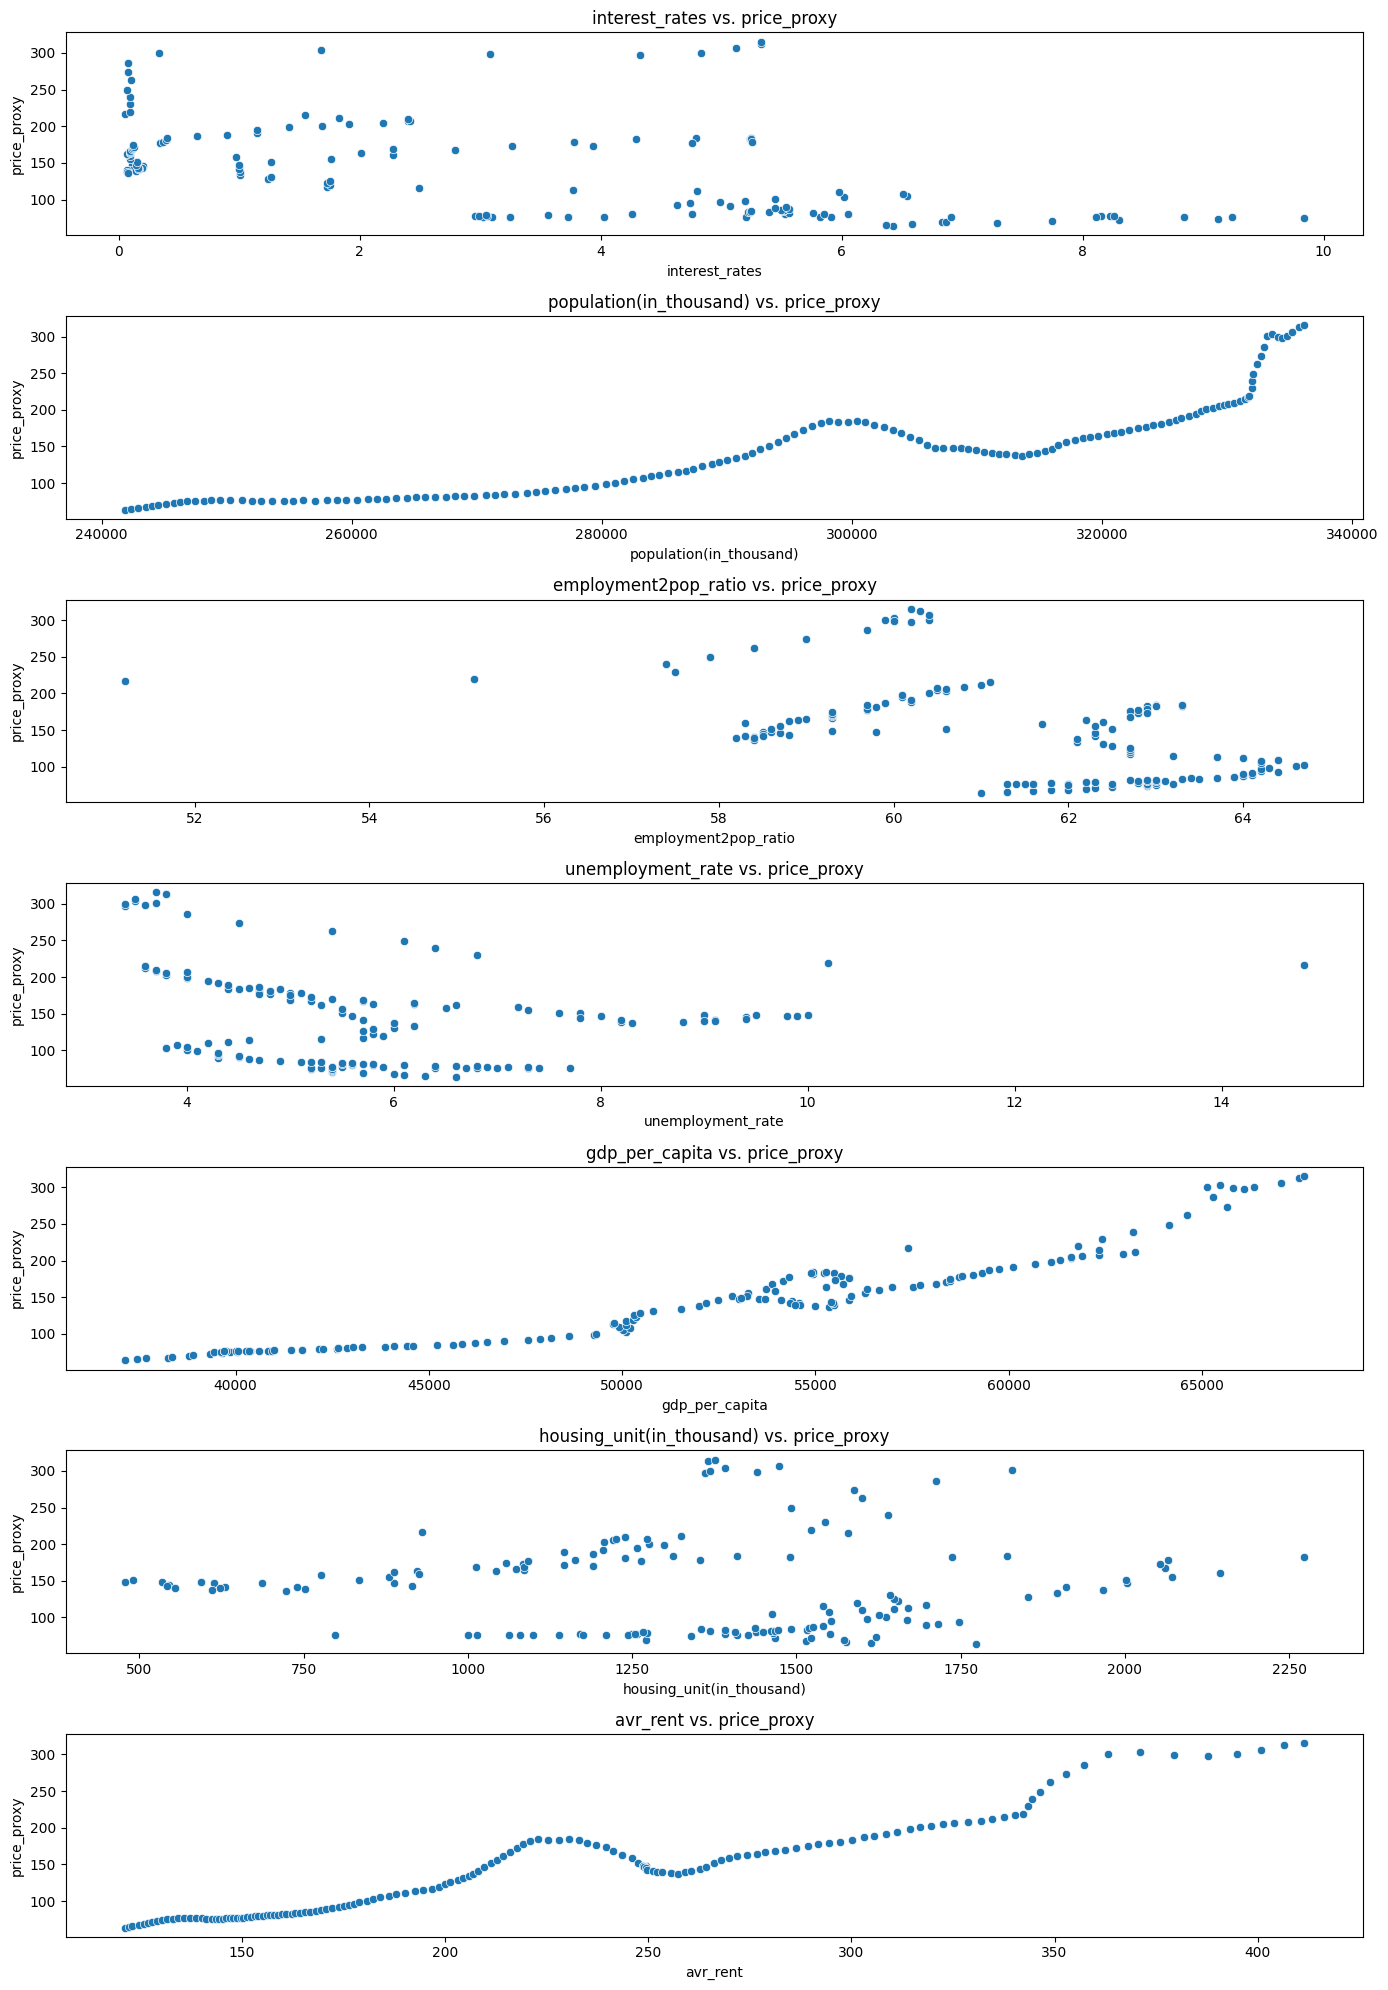

In [19]:
# Define the list of columns to plot against price_proxy
columns_to_plot = ['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']

# Set up the plotting area
plt.figure(figsize=(14, 20))

# Create a scatter plot for each column against price_proxy
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    sns.scatterplot(x=column, y='price_proxy', data=data)
    plt.xlabel(column)
    plt.ylabel('price_proxy')
    plt.title(f'{column} vs. price_proxy')

plt.tight_layout()
plt.show()


## outlier detection

In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be normalized
columns_to_normalize = ['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent', 'price_proxy']

# Normalize the columns
df[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


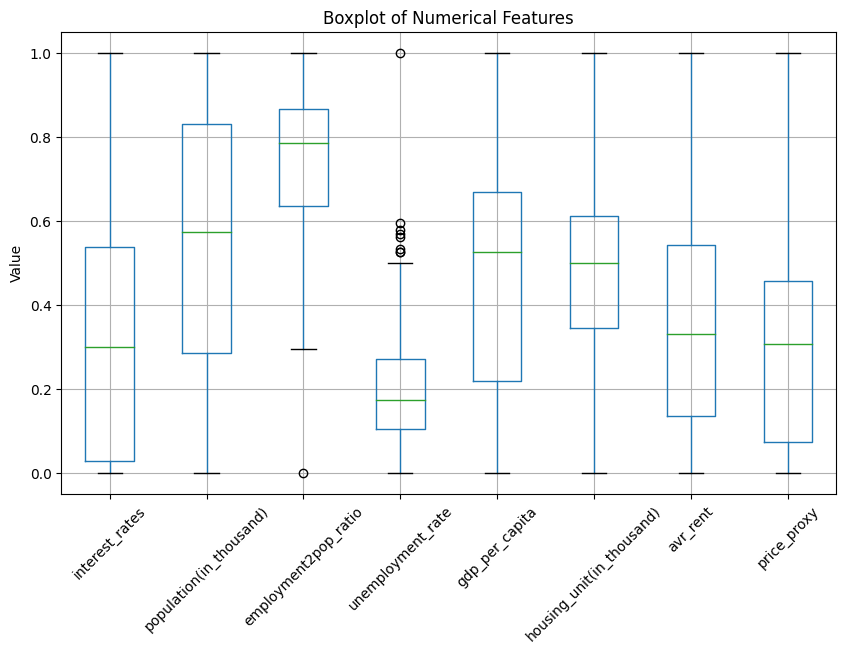

In [27]:
plt.figure(figsize=(10, 6))
df.drop(columns=['DATE']).boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

## Statistical Analysis

In [29]:
import pandas as pd
import statsmodels.api as sm


X= data[['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']]

# Add a constant term for the intercept
X = sm.add_constant(X)

y = data['price_proxy']
model = sm.OLS(y,X).fit()


In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_proxy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     915.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.83e-114
Time:                        02:32:51   Log-Likelihood:                -543.92
No. Observations:                 149   AIC:                             1104.
Df Residuals:                     141   BIC:                             1128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## feature selection

In [39]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'data' is your DataFrame
X = data[['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']]
y = data['price_proxy']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                     Feature  Importance
6                   avr_rent    0.397628
1    population(in_thousand)    0.341840
4             gdp_per_capita    0.222541
3          unemployment_rate    0.029872
2       employment2pop_ratio    0.003786
5  housing_unit(in_thousand)    0.002392
0             interest_rates    0.001941
